# Midterm assigment
**Image enhancement** is the process of improving the visual quality of an image by adjusting its characteristics, such as contrast, brightness, or color balance. Image enhancement techniques can be used to emphasize certain features, correct for poor lighting conditions, or simply make an image more aesthetically pleasing.

In this assignment, students will implement different image enhancement techniques using Python and OpenCV to gain a deeper understanding of how these methods work and their applications in real-world scenarios.

The assignment can be structured as follows:

1. Load an image: The first step is to load an image into the code using a library such as OpenCV or Pillow. The image should have some room for improvement in terms of brightness, contrast, or color balance.

2. Histogram equalization: Apply histogram equalization to improve the contrast of the image. Use cv2.equalizeHist() for grayscale images or apply it to each color channel separately for color images. Plot the equalized image alongside the original image using a plotting library such as Matplotlib.

3. Contrast stretching: Implement a contrast stretching function that rescales the pixel intensities in the image to a desired range, such as [0, 255]. Apply the function to the image and plot the contrast-stretched image alongside the original and equalized images.

4. Adaptive histogram equalization: Apply adaptive histogram equalization using the Contrast Limited Adaptive Histogram Equalization (CLAHE) method in OpenCV (cv2.createCLAHE()). Compare the results with global histogram equalization and plot the adaptively equalized image.

5. Color balance: Implement a color balance correction function that adjusts the color channels in the image to remove color casts (e.g., due to poor lighting conditions). One approach is to scale the intensities in each channel so that they have the same mean or median value. Apply the function to the image and plot the color-balanced image alongside the other enhanced images.

By completing this assignment, students can gain hands-on experience with various image enhancement techniques and learn how to apply these methods to improve the visual quality of digital images.

### 1. Histogram equalization

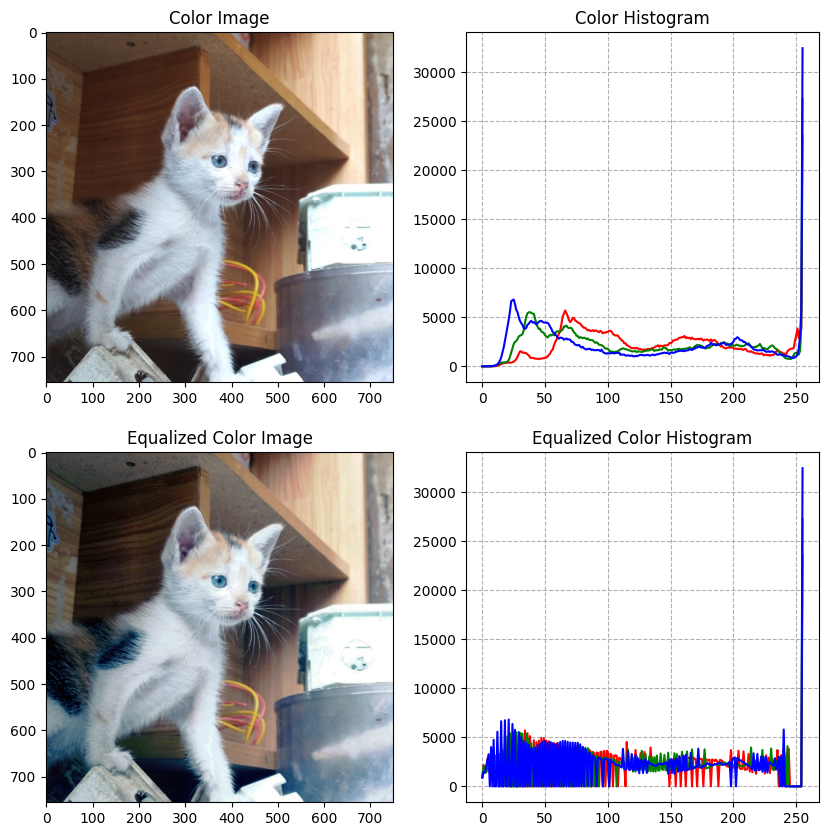

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the color image
color_img = cv2.imread('m.jpg')

# Split the image into its color channels
b, g, r = cv2.split(color_img)

# Compute the histograms for each color channel
hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

# Apply histogram equalization to each channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Merge the equalized channels back into a color image
equalized_color_img = cv2.merge((eq_b, eq_g, eq_r))

# Compute the histograms for each channel of the equalized image
equalized_hist_r = cv2.calcHist([eq_r], [0], None, [256], [0, 256])
equalized_hist_g = cv2.calcHist([eq_g], [0], None, [256], [0, 256])
equalized_hist_b = cv2.calcHist([eq_b], [0], None, [256], [0, 256])

# Plot the original color image, its histogram, the equalized color image, and its histogram
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0, 0].imshow(cv2.cvtColor(color_img, cv2.COLOR_BGR2RGB))
axes[0, 0].set_title('Color Image')

axes[0, 1].plot(hist_r, color='r')
axes[0, 1].plot(hist_g, color='g')
axes[0, 1].plot(hist_b, color='b')
axes[0, 1].set_title('Color Histogram')
axes[0, 1].set_axisbelow(True)
axes[0, 1].grid(True, linestyle='--', zorder=0)
axes[1, 0].imshow(cv2.cvtColor(equalized_color_img, cv2.COLOR_BGR2RGB))
axes[1, 0].set_title('Equalized Color Image')

axes[1, 1].plot(equalized_hist_r, color='r')
axes[1, 1].plot(equalized_hist_g, color='g')
axes[1, 1].plot(equalized_hist_b, color='b')
axes[1, 1].set_title('Equalized Color Histogram')
axes[1, 1].grid(True, linestyle='--', zorder=0)
axes[1, 1].set_axisbelow(True)

plt.show()


##
1.	Phân tích chung

- Đây là 1 bức ảnh chưa thực sự cân bằng, ảnh hơi bị ngả về tông tối. nhìn chung, những vùng tối của bức ảnh không thực sự bị quá tối so với tổng thể bức ảnh. Các vùng sáng của bức ảnh chiếm khá ít, vùng sáng thực sự bị chênh lệnh rõ rệt với bức ảnh. Phần vùng sáng phía bên tay phải của bức ảnh hơi quá sáng so với phần còn lại của bức ảnh Phần midterm của bức ảnh khá cân bằng và đều màu, hầu như không có điểm nào quá sáng hoặc quá tối

2.	Color histogram
	-   Với biểu đồ histogram trên ta sẽ chia làm 3 phần đó là : Shadows, Highlights và Midtones
        a.	Shadows
        -	Với vùng shadows ta sẽ lấy giá trị từ 0 – 75
        -   Giá trị cao nhất với màu blue trong vùng trên đạt 25 và chiếm khoảng 7800px – 7950px  
        -   Giá trị cao nhất với màu green trong vùng trên đạt 37.5 và chiếm khoảng 5600px
        -   Giá trị cao nhất với màu red trong vùng đạt 66 và chiếm khoảng 5700px
        b.  Vùng Midtones
        -   Giá trị cao nhất với màu (red, green, blue) đạt 75-80 chiếm lần lượt khoảng (4800px,3450px và 2150px)
        c.  Vùng highlight
        -   Giá trị cao nhất nằm trong vùng từ 250-256 và chiếm số lượng px rất cao so với phần còn lại của vùng highlight




3.	Equalized color

    a.  Vùng tối

    -   Đây là biểu đồ histogram sau khi được cân bằng biểu đồ (phía tay trái), vùng tối của hình được đẩy mạnh, các giá trị màu từ 23 – 30 bị giảm khoảng 1/6 lượng px. Với giá trị màu từ 0-20 thì được tăng mạnh. Biểu đồ Equalized color histogram không còn liên tục như color histogram, thay vào đó hình thành nhiều đỉnh nhỏ cách đều nhau tạo thành 1 sườn núi trải dần về phía Midtones.

    

![](https://i.imgur.com/56MY5Ds.png)

histogram vùng tối


b.	Midtones.

-	Vùng midtones nhìn chung không có nhiều sự thay đổi, riêng giá trị màu từ 115 – 150 được tăng mạnh về số lượng px. 
-   Ví dụ : màu đỏ ở giá trị màu 116 từ khoảng 2000px được tăng mạnh thành 4200- 4300px.
-	Riêng với màu green và bule thì khu vực được tăng rộng hơn từ 115-175


![](https://i.imgur.com/nO9IEPz.png)

histogram midtones

c.  vùng sáng

-   Vùng sáng không có sự thay đổi thực sự rõ rệt. nhìn chung các giá trị trong khoảng từ 200-245 đều được tăng lương px so với ảnh gốc. khác với vùng tối, các giá trị tăng giảm không thực sự liên tục và đều nhau.

![](https://i.imgur.com/Wa1AkZE.png)

histogram vùng sáng

4.	Nhận xét chung

-	Equalized color sẽ giúp cân bằng độ tương phản giữa các màu trong ảnh, biểu đồ histogram của ảnh sẽ được cân bằng hơn. Với hình ảnh đang được sử dụng, equalized color không tạo ra quá nhiều sự thay đổi về màu sắc. nếu chỉ nhìn vào hình ảnh sau khi được equalized color thì với hình ảnh được sử dụng, ta chỉ thấy màu blue được thay đổi rõ rệt hơn so với các màu khác. Vùng tối là nơi được thay đổi nhiều nhất nên khi nhìn vào, ta cũng sẽ thấy được sự tương phản rõ rệt hơn một chút so với ảnh gốc.

### 2. Contrast stretching

#### 2.1. Color images

In [2]:
def contrast_stretching_color_image(img, a, b, c, d):

    # Initialize the output image with zeros of the same shape as the input image
    stretched_img = np.zeros_like(img)

    # Loop over each color channel in the image
    for channel in range(img.shape[2]):
        pixel_vals = img[:, :, channel]
        # Calculate the new pixel intensities using linear transformation and set them to the output image
        stretched_vals = np.where(pixel_vals < a, c, np.where(pixel_vals > b, d, ((pixel_vals - a) * ((d - c) / (b - a))) + c))
        stretched_img[:, :, channel] = stretched_vals

    return stretched_img

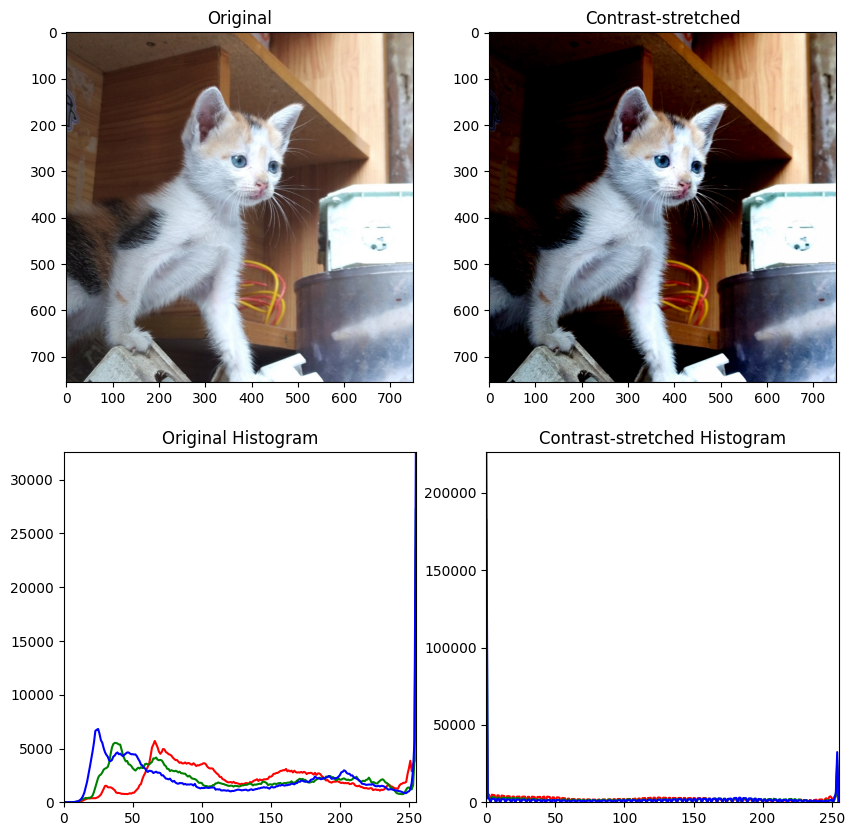

In [5]:
# Load a color image
img = cv2.imread('m.jpg', cv2.IMREAD_COLOR)

# Convert the image to RGB for displaying with Matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Calculate the histograms of the original and contrast-stretched images
orig_hist_r, _ = np.histogram(img[:, :, 0], bins=256, range=(0, 255))
orig_hist_g, _ = np.histogram(img[:, :, 1], bins=256, range=(0, 255))
orig_hist_b, _ = np.histogram(img[:, :, 2], bins=256, range=(0, 255))

stretched_img = contrast_stretching_color_image(img, 70, 255, 0, 255)
stretched_hist_r, _ = np.histogram(stretched_img[:, :, 0], bins=256, range=(0, 255))
stretched_hist_g, _ = np.histogram(stretched_img[:, :, 1], bins=256, range=(0, 255))
stretched_hist_b, _ = np.histogram(stretched_img[:, :, 2], bins=256, range=(0, 255))

# Plot the images and histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].imshow(img)
axs[0, 0].set_title('Original')

axs[0, 1].imshow(stretched_img)
axs[0, 1].set_title('Contrast-stretched')

axs[1, 0].plot(orig_hist_r, color='red')
axs[1, 0].plot(orig_hist_g, color='green')
axs[1, 0].plot(orig_hist_b, color='blue')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, max(max(orig_hist_r), max(orig_hist_g), max(orig_hist_b)) + 100])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].plot(stretched_hist_r, color='red')
axs[1, 1].plot(stretched_hist_g, color='green')
axs[1, 1].plot(stretched_hist_b, color='blue')
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, max(max(stretched_hist_r), max(stretched_hist_g), max(stretched_hist_b)) + 100])
axs[1, 1].set_title('Contrast-stretched Histogram')

plt.show()

## 2.1 color image

1.color image trong Contrast stretching

-   contrast stretching color image đơn giản  sẽ quét hình ảnh để tìm các giá trị pixel thấp nhất và cao nhất hiện có trong hình ảnh, lần lượt là a và b

Sau đó, mỗi pixel P được chia tỷ lệ bằng hàm sau:
        P_out = (P_m - a) * ((d - c) / (b - a)) + c
- hàm contrast_stretching_color_image có thể tùy chỉnh giá trị tương phản với đầu vào là a
- giới hạn dưới và giới hạn trên của hàm lần lượt là C và D contrast_stretching_color_image(img, a, b, c, d)
    

![](https://i.imgur.com/Uz2SjYF.png)

nhận xét:

-   đồ thị histogram không còn dữ được sự liên lục nối tiếp. thay vào đó, biểu đồ tăng giảm lặp lại liên tục với tần suất rất lớn.
thay vào đó, các đỉnh của biểu đồ lại tạo ra một đường trải dài dọc theo trục X biểu đồ.
-   nhìn chung, contrast-stretched làm cho biểu đồ cân bằng hơn, với biểu đồ histogram gốc. ta có thể thấy sự thay đổi liên tục và bất thường. nhưng với contrast-stretched sẽ giúp cho biểu đồ cân bằng hơn (trừ 2 khu vực gần trục Y và 250 trên trục X).
-   riêng với khu vực gần trục Y và 250 trên trục X có sự thay đổi rất độ ngột, các pixel ở hai khu vực này tăng mạnh và rất cao so với khu vực còn lại.
ngoài ra ta có thể thấy, nếu tăng giá trị a như trong công thức trên và giữ nguyên mọi giá trị còn lại, ta có thể thấy sự thay đổi của biểu đồ.

histogram ảnh gốc và contrast-stretched Histogram

2. nhận xét chung
    
- so với bức hình gốc contrast stretching color image giúp tăng độ tương phản, biểu đồ histogram được phân bổ đều hơn nhưng không liên tục, bị đứt đoạn đều nhau.
- tùy vào giá trị đầu vào của hàm contrast stretching color image mà cho ra được các bức hình khác nhau, các biểu đồ histogram khác nhau.
- contrast stretching color image sẽ giúp những phần tối, giữa và sáng của bức hình trở nên rõ rệt hơn. để có kết quả tốt, mỗi hình nên được áp dụng một giá trị đầu vào khác nhau. 

#### 2.2. Gray-scale images

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching_gray_image(img, a, b, c, d):
    # Initialize the output image with zeros of the same shape as the input image
    stretched_img = np.zeros_like(img)

    # Loop over each pixel in the image
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = img[i, j]
            # If the pixel value is less than the lower limit of the pixel intensity range, set it to the lower limit of the output pixel intensity range
            if pixel_val < a:
                new_val = c
            # If the pixel value is greater than the upper limit of the pixel intensity range, set it to the upper limit of the output pixel intensity range
            elif pixel_val > b:
                new_val = d
            # Otherwise, calculate the new pixel intensity using linear transformation and set it to the output image
            else:
                new_val = ((pixel_val - a) * ((d - c) / (b - a))) + c
            stretched_img[i, j] = new_val

    return stretched_img

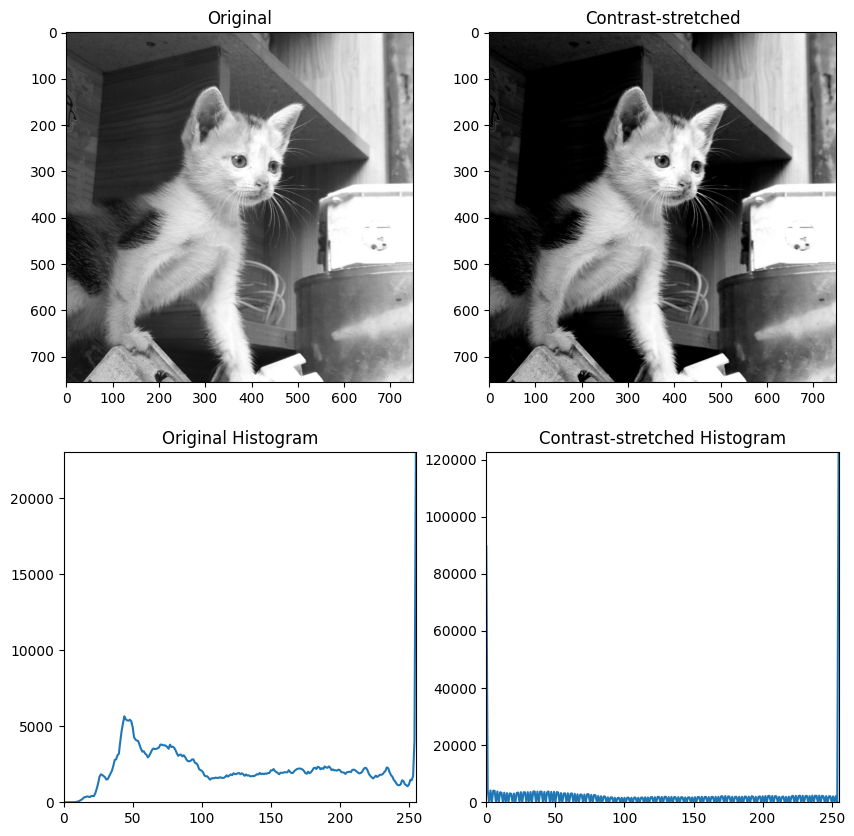

In [12]:
# Load an image
img = cv2.imread('m.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histograms of the original and contrast-stretched images
orig_hist, _ = np.histogram(img, bins=256, range=(0, 255))
stretched_hist, _ = np.histogram(contrast_stretching_gray_image(img, 50, 200, 0, 255), bins=256, range=(0, 255))

# Plot the images and histograms
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')
axs[0, 1].imshow(contrast_stretching_gray_image(img, 50, 255, 0, 255), cmap='gray')
axs[0, 1].set_title('Contrast-stretched')

axs[1, 0].plot(orig_hist)
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, max(orig_hist) + 100])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].plot(stretched_hist)
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, max(stretched_hist) + 100])
axs[1, 1].set_title('Contrast-stretched Histogram')

plt.show()

### 2.2 Gray-scale images


2.2.a Gray-scale images là gì

- cũng giống với Contrast stretching color image, gray-scale đưa ảnh về dạng thang màu xám.

- Gray-scale thường được áp dụng trong y học, chụp hình trong không gian để phát hiện vật thể...

2.2.b histogram 
 
- giống với histogram (hình gốc) khu vực 240-255 vẫn chiếm 1 lượng pixel rất lớn so với tổng thể biểu đồ.

- contrast stretching gray-scalesẽ quét hình ảnh để tìm các giá trị pixel thấp nhất và cao nhất hiện có trong hình ảnh. Gọi đây là a và b . Sau đó, mỗi pixel P được chia tỷ lệ bằng hàm sau:

    P_out = (P_m - a) * ((d - c) / (b - a)) + c

- khi đưa về thang xám, các vật thể trong ảnh đôi khi sẽ nhìn rõ hơn so với khi ảnh có màu.

- trên biểu đồ histogram các giá trị từ 0-70 trên trục X vẫn có phần nhỉnh và cao hơn so với phần còn lại
    
- vì thang màu xám, với các giá trị khác nhau chỉ giúp hình phân biệt rõ rệt trắng và đen.


### 3. Adaptive histogram equalization

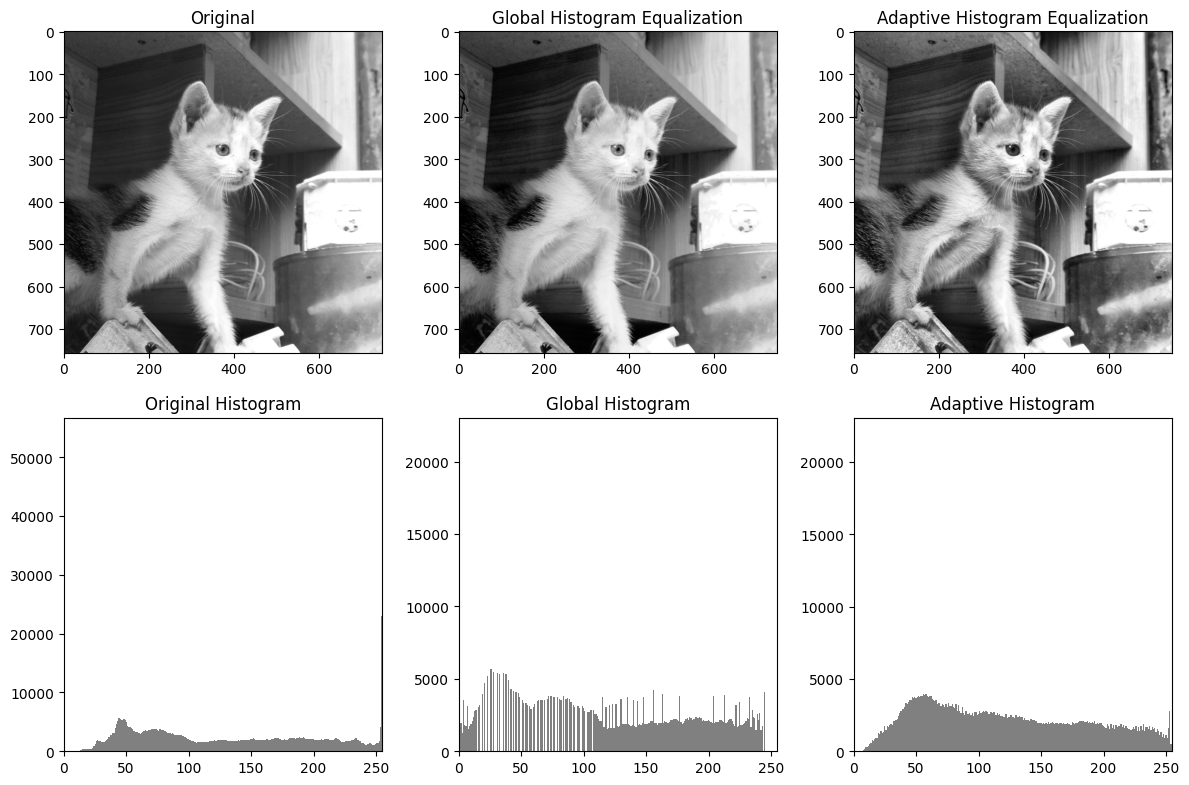

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image in grayscale
img = cv2.imread('m.jpg', cv2.IMREAD_GRAYSCALE)

# Apply global histogram equalization
global_hist_eq = cv2.equalizeHist(img)
global_hist, _ = np.histogram(global_hist_eq, bins=256, range=(0, 255))

# Apply adaptive histogram equalization using CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
adaptive_hist_eq = clahe.apply(img)
adaptive_hist, _ = np.histogram(adaptive_hist_eq, bins=256, range=(0, 255))

# Plot the original, global histogram equalized, and adaptively equalized images and histograms
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original')

axs[0, 1].imshow(global_hist_eq, cmap='gray')
axs[0, 1].set_title('Global Histogram Equalization')

axs[0, 2].imshow(adaptive_hist_eq, cmap='gray')
axs[0, 2].set_title('Adaptive Histogram Equalization')

axs[1, 0].hist(img.flatten(), bins=256, range=(0, 255), color='gray')
axs[1, 0].set_xlim([0, 255])
axs[1, 0].set_ylim([0, img.size/10])
axs[1, 0].set_title('Original Histogram')

axs[1, 1].bar(np.arange(256), global_hist, color='gray', width=1)
axs[1, 1].set_xlim([0, 255])
axs[1, 1].set_ylim([0, global_hist.max()+100])
axs[1, 1].set_title('Global Histogram')

axs[1, 2].bar(np.arange(256), adaptive_hist, color='gray', width=1)
axs[1, 2].set_xlim([0, 255])
axs[1, 2].set_ylim([0, adaptive_hist.max()+100])
axs[1, 2].set_title('Adaptive Histogram')

plt.tight_layout()
plt.show()

3. Adaptive histogram equalization
- adaptive histogram equalization là một kỹ thuật xử lý hình ảnh kỹ thuật số được sử dụng để nâng cao độ tương phản của hình ảnh
- khác với cân bằng histogram của ảnh thông thường, Adaptive histogram equalization tăng cường hình ảnh cục bộ
- điểm bất lợi khi sử dụng phương pháp Adaptive histogram equalization là Adaptive histogram equalization sẽ khuếch đại quá mức ở những vùng hình ảnh gần nhưu tương đối nhau (hình 1)
- để điều chỉnh giá trị của kĩ thuật Adaptive histogram chỉ cần thay đổi giá trị trong hàm createCLAHE với clipLimit (ngưỡng giới hạn) từ 1-40


![](https://i.imgur.com/2wycfy5.png)

(hình 1)

- Adaptive histogram nhìn chung nối tiếp và đều nhau, trên sườn của histogram không có sự thay đổi nào quá đột ngột.
- xét toàn histogram không có khu vực nào chênh lệnh quá lớn (hình 2 so sánh giữa Adaptive histogram và contrast-stretched Histogram) 

![](https://i.imgur.com/zE6bwSi.png)

- lỗi điển hình thường gặp cũng có trong hình ảnh được lấy làm ví dụ, hình gốc cho ta thấy mắt mèo trong ảnh gốc vẫn có sự phân chia giữa con ngươi và lòng mắt. nhưng với kết quả của hình ảnh sau khi áp dụng kĩ thuật adaptive histogram, chúng ta không thể thấy rõ sự phân bổ rõ ràng. 

### 4. Conclusion

1. nhận xét chung
    - các thuật toán trong 3 phần đầu tiên đều hướng đến sự cân bằng, giúp hình ảnh hài hòa hơn song song bên đó mỗi thuật toán đều có sự khác nhau:
    - Equalized color giúp cải thiện màu sắc của bức ảnh, độ rực màu được cải thiện. màu sắc của bức hình được cân bằng hơn mà không bị tách biệt hoặc quá rõ rệt so với 2
    - Contrast stretching tập trung mạnh vào phần tương phản của bức hình, giúp cho người xem dễ nhìn thấy những chi tiết khó thấy trong bức hình, phát hiện những vật thể nhỏ, mờ,... nhưng với Contrast stretching Color images việc đưa vào giá trị đầu vào của bức hình không phù hợp, kết quả trả về có thể là một bức hình bị vỡ màu, sai lệch màu. khiến cho các vật thể trong hình càng khó nhìn hơn.
    - việc quy đổi về thang màu xám của Gray-scale images sẽ giúp xử lý được phần vỡ màu so với Contrast stretching Color images nhưng đổi lại, sẽ nhận lại ít thông tin về vật thể hơn trong hình, không rõ chính xác màu trong hình.
    - nhìn chung với tất cả các kĩ thuật trên, mỗi kĩ thuật sẽ tối ưu khả năng nhất khi được ứng dụng vào đúng trường hợp: 
    vd : Global Histogram Equalization hoặc Adaptive histogram là kĩ thuật tốt nhất nếu được áp dụng vào việc scan ảnh, chữ viết tay hoặc phát hiện vật thể khi chụp ảnh từ không gian.
    